# Facial Emotion Recogination

## importing libraries

In [1]:
# Importing the required libraries for creating a model and testing it

# Used for working with arrays
import numpy as np  

# It is used for data manipulation and analysis
import pandas as pd 

# Stands for Operating System used to work with the operating system
import os   

# It is for fast computation of data
import tensorflow as tf 

 # Used to process Images
from keras.preprocessing.image import ImageDataGenerator, load_img 

# Used for computation of data
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten  

# To Optimize the model
from tensorflow.keras.optimizers import Adam, RMSprop, SGD  

# Working with model 
from keras import regularizers  

# Importing modules to work with the model
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau

# Working with date and time
import datetime  

# Used for visualization of data
import matplotlib.pyplot as plt   

# For ploting a model
from tensorflow.keras.utils import plot_model  

## Importing Dataset

In [ ]:
# The directories of the training dataset and testing dataset
train_dir = './Dataset/train/'  
test_dir = './Dataset/test/'

# Specifying the size of images as 48 x 48
row, col = 48, 48

# There are 7 types of emotions in the dataset
classes = 7 

# Counting the total number of images in each class
def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df
  
# Storing them in a variable and printing it to console
train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')
print(train_count)
print(test_count)

       neutral   sad  disgust  happy  fear  surprise  angry
train     4965  4830      436   7215  4097      3171   3995
      neutral   sad  disgust  happy  fear  surprise  angry
test     1233  1247      111   1774  1024       831    958


### PLot of number of images in training set

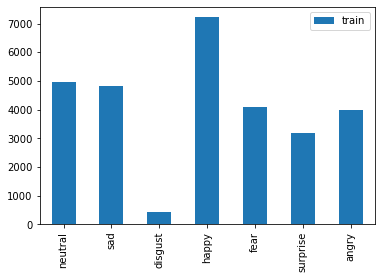

In [ ]:
# Ploting the training data count of each emotion as bar graph
train_count.transpose().plot(kind='bar')  

### PLot of number of images in test set

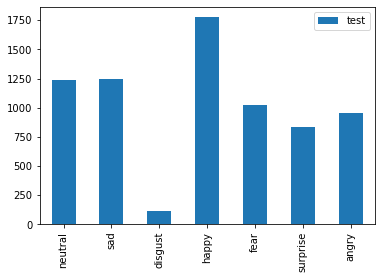

In [ ]:
test_count.transpose().plot(kind='bar')  # Ploting the testing data count of each emotion.

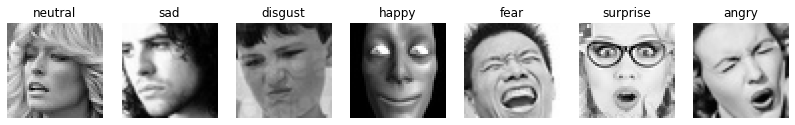

In [ ]:
plt.figure(figsize=(14,22))
i = 1
# Printing some of the images from each class
for expression in os.listdir(train_dir):
    img = load_img((train_dir + expression +'/'+ os.listdir(train_dir + expression)[5]))  # Loading the image
    plt.subplot(1,7,i)  # Plotting it to the plot at ith position
    plt.imshow(img)     # Show the image in the plot
    plt.title(expression) # Providing a title for the plot
    plt.axis('off')
    i += 1
plt.show()  # Displaying the plot

## Creating Training and test sets

#### The characteristics defined for training and testing model are : 

*   rescale : It is rescaling factor, defaults to None. If None or 0, no rescaling is applied, otherwise we multiply the data by the value provided
*   zoom_range : It's a float value or [lower, upper]
*   horizontal_flip : Boolean. Randomly flip inputs horizontally.
*   batch_size: the batch size (1 <= batch_size <= training dataset size), defaults to 32.
*   shuffle : Whether to shuffle the data, defaults to True.
*   color_mode : Allowed values are "grayscale", "rgb", "rgba".



In [ ]:
# Extracts the data from the training images by horizontally flipping them
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True)

# Getting the training set from the training images directory with color mode as grayscale
training_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

# Extracts the data from the testing images by horizontally flipping them
test_datagen = ImageDataGenerator(rescale=1./255)

# Getting the testing set from the testing images directory with color mode as grayscale
test_set = test_datagen.flow_from_directory(test_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
# Printing the types of emotions in the given dataset
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

## Defining Model

In [ ]:
# Defining the Model

def get_model(input_size, classes=7):
     #Initialising the CNN
    model = tf.keras.models.Sequential()   

    # creating a Sequential model incrementally via the add() method
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape =input_size))  # Creating a convolution kernel producing a tensor of outputs
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())  # Applies a transformation to data to normalize it
    model.add(MaxPooling2D(2, 2))    # Downsampling the input along its spatial dimensions
    model.add(Dropout(0.25))         # Applying Dropout to the input data
    
    # Applying the rectified linear unit activation 
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    

    model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Flatenning the data
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(classes, activation='softmax'))

    #Compliling the model
    model.compile(optimizer=Adam(lr=0.0001, decay=1e-6), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    # Returning the model
    return model

In [ ]:
# Using the model function created above
fernet = get_model((row,col,1), classes)
fernet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 256)       2

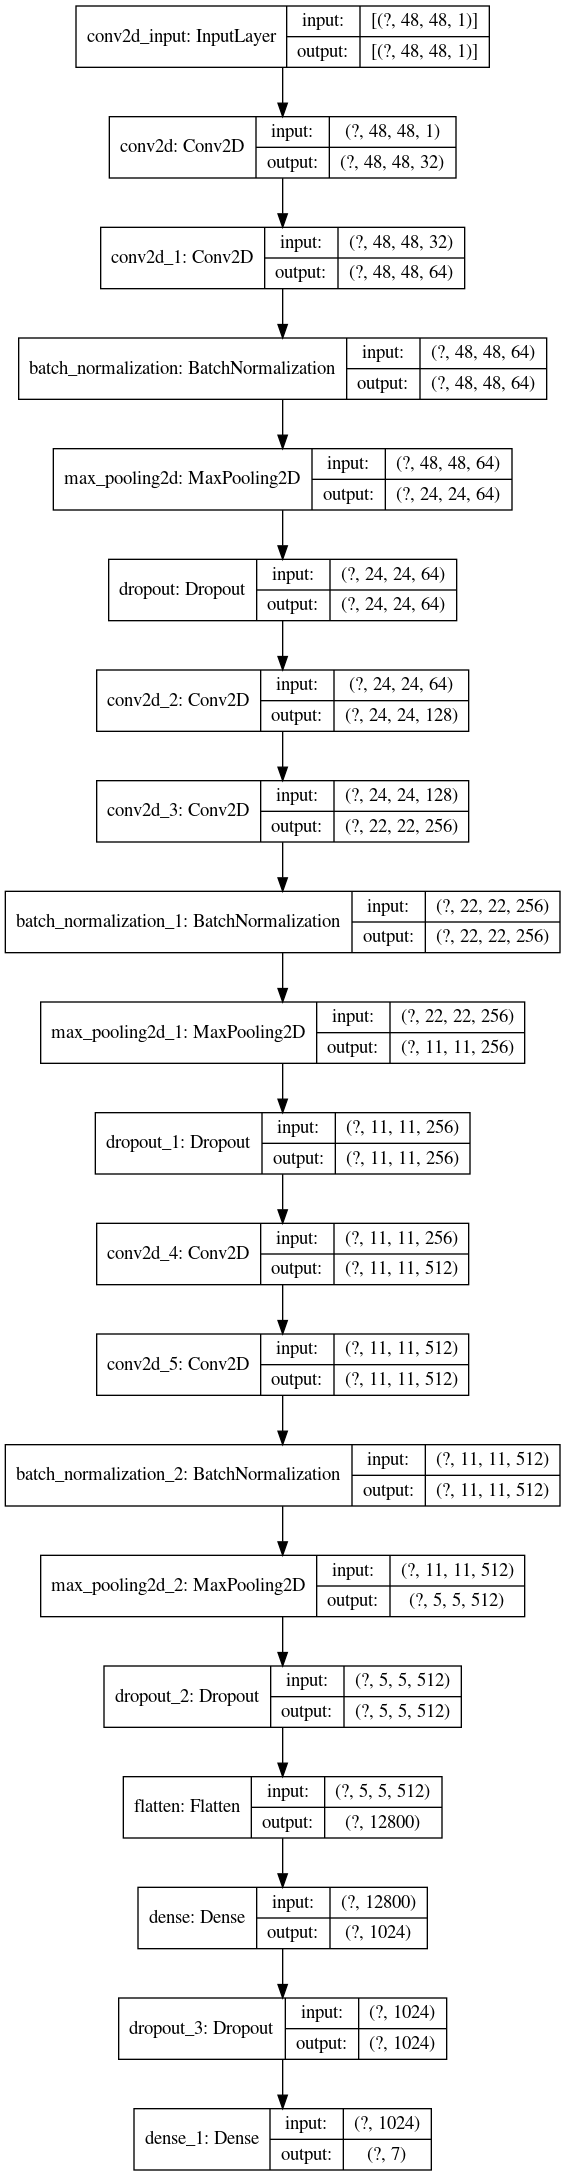

In [ ]:
# Plotting all the layers in the model 
plot_model(fernet, to_file='./Images/Layers.png', show_shapes=True, show_layer_names=True)

### Callbacks Function

In [ ]:
chk_path = './Weights/Weight.h5'  # The file name to save

# The directory is created by appending the date and time to it for storing the logs
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# Callback to save the model weights at some frequency
checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss')

# Stoping the training when a monitored metric has stopped improving
earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)

# Reducing the learning rate of the model when a metric has stopped improving     
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)

# Logging the details to the logs in log_dir directory
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('./Logs/training.log')

# Storing all the callbacks in a list for further use
callbacks = [checkpoint, reduce_lr, csv_logger]

## Training Model

Options used for training the model :


*   x : Input data for the model.
*   validation_data : Data on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data.
*   epochs: Integer. Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided.
*   callbacks: List of Callback instances that are needed to apply during training.
* steps_per_epoch: Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch.
* validation_steps : number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.



In [ ]:
# Training the model

# Dividing the number of images in training dataset with batch size
# gives us the total number of steps for training dataset

steps_per_epoch = training_set.n // training_set.batch_size

# Dividing the number of images in testing dataset with batch size
# gives us the total number of steps for testing dataset

validation_steps = test_set.n // test_set.batch_size

# Actual training of the model by providing the training dataset,callbacks and testing dataset for validation
hist = fernet.fit(x=training_set,
                 validation_data=test_set,
                 epochs=60,
                 callbacks=callbacks,
                 steps_per_epoch=steps_per_epoch,
                 validation_steps=validation_steps)

Epoch 1/60
448/448 [==============================] - ETA: 0s - loss: 12.2310 - accuracy: 0.2616
Epoch 00001: val_loss improved from inf to 12.11810, saving model to ferNet.h5
448/448 [==============================] - 75s 167ms/step - loss: 12.2310 - accuracy: 0.2616 - val_loss: 12.1181 - val_accuracy: 0.2052
Epoch 2/60
448/448 [==============================] - ETA: 0s - loss: 9.6264 - accuracy: 0.3194
Epoch 00002: val_loss improved from 12.11810 to 8.32903, saving model to ferNet.h5
448/448 [==============================] - 34s 76ms/step - loss: 9.6264 - accuracy: 0.3194 - val_loss: 8.3290 - val_accuracy: 0.3958
Epoch 3/60
448/448 [==============================] - ETA: 0s - loss: 7.2760 - accuracy: 0.3626
Epoch 00003: val_loss improved from 8.32903 to 6.24445, saving model to ferNet.h5
448/448 [==============================] - 36s 80ms/step - loss: 7.2760 - accuracy: 0.3626 - val_loss: 6.2445 - val_accuracy: 0.4029
Epoch 4/60
448/448 [==============================] - ETA: 0s - l

## Loss and Accuracy plot

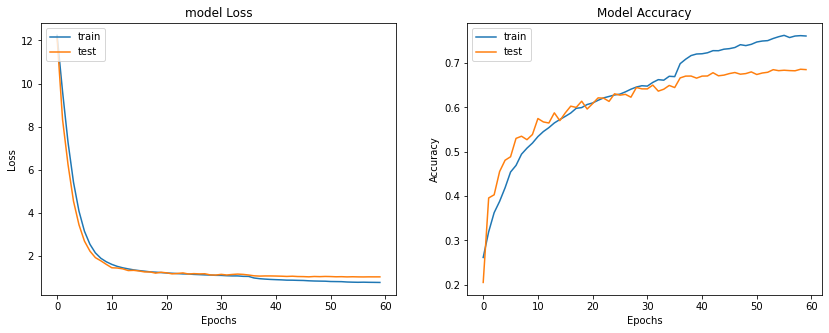

In [ ]:
# Plotting the loss and accuracy plots for the training and testing dataset

plt.figure(figsize=(14,5))  # Initializing a figure for the plot
plt.subplot(1,2,2)      # Creating a subplot for second graph
plt.plot(hist.history['accuracy'])  # Plotting the values
plt.plot(hist.history['val_accuracy']) # Plotting the values
plt.title('Model Accuracy')  # Giving the subplot a title
plt.xlabel('Epochs')        # Providing x-label for the subplot
plt.ylabel('Accuracy')      # Providing y-label for the subplot
plt.legend(['train', 'test'], loc='upper left')  # Creating a legend on the upper left corner

plt.subplot(1,2,1)  # Creating a subplot for first graph
plt.plot(hist.history['loss'])  # Plotting the values
plt.plot(hist.history['val_loss'])  # Plotting the values
plt.title('model Loss')  # Giving the subplot a title
plt.xlabel('Epochs')  # Providing x-label for the subplot
plt.ylabel('Loss')    # Providing y-label for the subplot
plt.legend(['train', 'test'], loc='upper left')  # Creating a legend on the upper left corner
plt.show()  # Displaying the plot to the output console

### Model evaluation

In [ ]:
# Evaluating the model for training loss,training accuracy, testing loss and testing accuracy using evaluate function
train_loss, train_accu = fernet.evaluate(training_set)
test_loss, test_accu = fernet.evaluate(test_set)

# Printing the accuracy in the percentage format
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

113/113 [==============================] - 4s 36ms/step - loss: 1.0468 - accuracy: 0.6856
final train accuracy = 82.05 , validation accuracy = 68.56


In [ ]:
# Saving the weights to a file
fernet.save_weights('./Weights/Model_bestweight.h5')

### Confusion Matrix and Classification on training set

Confusion Matrix
[[ 564   61  463 1048  726  671  462]
 [  58   10   49  110   78   79   52]
 [ 564   53  508 1069  800  645  458]
 [ 957  101  844 1897 1410 1193  813]
 [ 658   70  606 1263  950  878  540]
 [ 686   59  580 1208  933  811  553]
 [ 418   38  390  813  630  550  332]]
Classification Report
              precision    recall  f1-score   support

       angry       0.14      0.14      0.14      3995
     disgust       0.03      0.02      0.02       436
        fear       0.15      0.12      0.13      4097
       happy       0.26      0.26      0.26      7215
     neutral       0.17      0.19      0.18      4965
         sad       0.17      0.17      0.17      4830
    surprise       0.10      0.10      0.10      3171

    accuracy                           0.18     28709
   macro avg       0.15      0.14      0.14     28709
weighted avg       0.18      0.18      0.18     28709



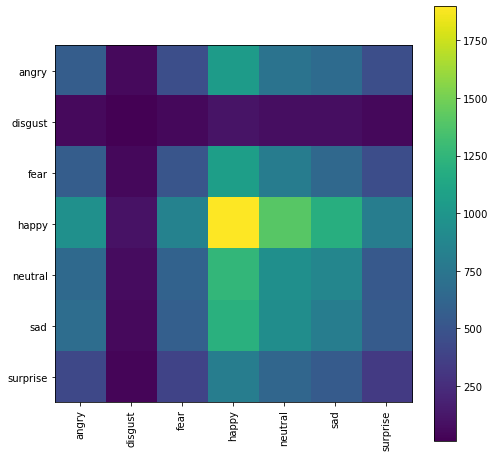

In [ ]:
# Generates output predictions for the training set.

y_pred = fernet.predict(training_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

# Creating a classification report and confusion matrix for the given training data
from sklearn.metrics import classification_report, confusion_matrix
cm_train = confusion_matrix(training_set.classes, y_pred)
print('Confusion Matrix')
print(cm_train)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(training_set.classes, y_pred, target_names=target_names))

# Creating a figure for the plot to show the report
plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

### Confusion Matrix and Classification on test set

Confusion Matrix
[[134  13 116 224 200 167 104]
 [ 12   0  22  25  14  26  12]
 [147  10 136 244 198 160 129]
 [233  20 219 444 343 308 207]
 [186  13 135 281 265 206 147]
 [179  12 122 338 258 206 132]
 [113   8 114 200 155 144  97]]
Classification Report
              precision    recall  f1-score   support

       angry       0.13      0.14      0.14       958
     disgust       0.00      0.00      0.00       111
        fear       0.16      0.13      0.14      1024
       happy       0.25      0.25      0.25      1774
     neutral       0.18      0.21      0.20      1233
         sad       0.17      0.17      0.17      1247
    surprise       0.12      0.12      0.12       831

    accuracy                           0.18      7178
   macro avg       0.15      0.15      0.15      7178
weighted avg       0.18      0.18      0.18      7178



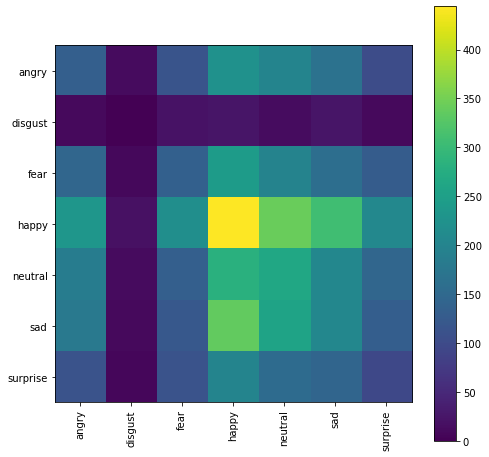

In [ ]:
# Generates output predictions for the testing set.

y_pred = fernet.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

# Creating a classification report and confusion matrix for the given testing data
cm_test = confusion_matrix(test_set.classes, y_pred)
print('Confusion Matrix')
print(cm_test)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(test_set.classes, y_pred, target_names=target_names))

# Creating a figure for the plot to show the report
plt.figure(figsize=(8,8))
plt.imshow(cm_test, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)